<img src="https://i.imgur.com/6U6q5jQ.png"/>

_____

In [1]:
import numpy as np

rng = np.random.RandomState(42)
data = rng.randint(0, 2, 20)

print(data)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0]


In [7]:
[np.binary_repr(i, 3) for i in range(8)]

['000', '001', '010', '011', '100', '101', '110', '111']

In [8]:
rule_number = 30
rule_string = np.binary_repr(rule_number, 8)
rule = np.array([int(bit) for bit in rule_string])
print(rule)


[0 0 0 1 1 1 1 0]


In [10]:
def CA_run(initial_state, n_steps, rule_number):
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    m_cells = len(initial_state)
    CA_run = np.zeros((n_steps, m_cells))
    CA_run[0, :] = initial_state

    for step in range(1, n_steps):
        all_triplets = np.stack(
            [
                np.roll(CA_run[step - 1, :], 1),
                CA_run[step - 1, :],
                np.roll(CA_run[step - 1, :], -1),
            ]
        )
        CA_run[step, :] = rule[np.apply_along_axis(rule_index, 0, all_triplets)]

    return CA_run


In [12]:
def rule_index(triplet):
    L, C, R = triplet
    index = 7 - (4 * L + 2 * C + R)
    return int(index)

(-0.5, 299.5, 149.5, -0.5)

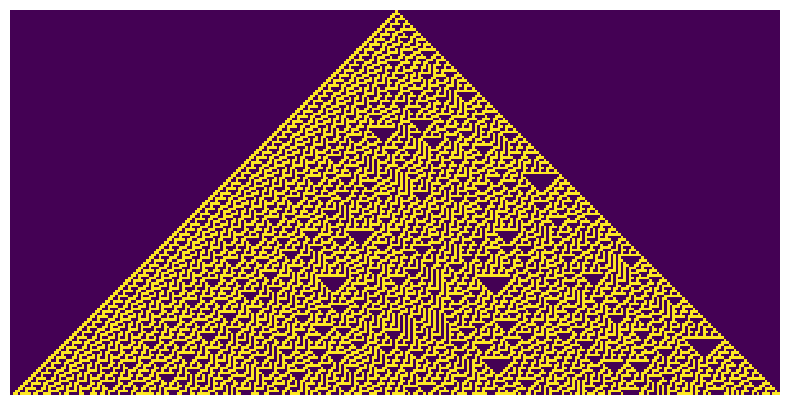

In [14]:
import matplotlib.pyplot as plt
initial = np.zeros(300)
initial[300 // 2] = 1
data = CA_run(initial, 150, 30)

fig, ax = plt.subplots(figsize=(10, 5))
ax.matshow(data)
ax.axis(False)

https://blog.scientific-python.org/matplotlib/elementary-cellular-automata/

Statistical analysis benefits primarily the study of variables/ factors distributions. We could complement that approach if we focus on the actors that produce the variables.

However, representing the actor is not an easy task:

* A social outcome is a **complex** aggregate of individual actors. In general we call social outcomes **emergent** results of individual decisions.

* Individual decisions have been assumed to be rational, which over simplyfies models of actors. As a matter of fact, decision making is a field under study.

* Information processing of agents is biased by "culture" (beliefs, experience) and institutions (rules, habits). And many paradigms can co-exist in a particular group. Change is possible, but social structure and culture limits it.

* Actors actions and decisions occur within a network of agents. An actor can be part of several networks. 


The field related to this study is **Computational Social Science**. The particular methodology is **agent-based modelling**.

## Agents have strategies:

In [ ]:
strategies=['Rock','Paper','Scissors']

## The world has rules

In [ ]:
payoff={('Rock','Paper'):(0,1),
        ('Paper','Rock'):(1,0),
        ('Rock','Scissors'):(1,0),
        ('Scissors','Rock'):(0,1),
        ('Paper','Scissors'):(0,1),
        ('Scissors','Paper'):(1,0),
        ('Rock','Rock'):(0,0),
        ('Paper','Paper'):(0,0),
        ('Scissors','Scissors'):(0,0)}

## Creating and setting up agents:

In [ ]:
Players=[{'name':'John','score':0,'strategy':None},
         {'name':'Mary','score':0,'strategy':None}]

## The agent has a particular mechanism to make decisions

In [ ]:
from random import choice

#simples: choose randomly
choice(strategies)

## Let the game begin!

* ### agent makes a choice

In [ ]:
Players[0]['strategy']=choice(strategies)
Players[1]['strategy']=choice(strategies)

In [ ]:
Players

* ### Current move

In [ ]:
Players[0]['strategy'],Players[1]['strategy']

In [ ]:
# social result of individual decision
result = payoff[Players[0]['strategy'],Players[1]['strategy']]
result

* ### agent benefits / suffers from decision made

In [ ]:
# update agents situation
Players[0]['score']+=result[0]
Players[1]['score']+=result[1]

In [ ]:
# current agent situation
Players

## Social outcome

In [ ]:
import pandas as pd 

socialResults=pd.DataFrame((Players[0], Players[1]))
socialResults

In [ ]:
winnerScore=socialResults.score.max()

#social outcome
socialResults[socialResults.score==winnerScore]

# More players

In [ ]:
# names of players
names=['Jim','Jane','Peter','Zoe']

In [ ]:
# setting up players
society=[{'name':n,'score':0,'strategy':None} for n in names]

In [ ]:
# each player a dict:
society

In [ ]:
import itertools 

# pair is a tuple of dicts
for pair in itertools.combinations(society,2):
    print(pair)

In [ ]:
import itertools 

# each dict
for player1,player2 in itertools.combinations(society,2):
    print(player1,player2)

In [ ]:
# resetting society
society=[{'name':n,'score':0,'strategy':None} for n in names]

# several rounds
for aRound in range(100):
    
    # en each round:
    for player1,player2 in itertools.combinations(society,2):
        # each chooses strategy
        player1['strategy']=choice(strategies)
        player2['strategy']=choice(strategies)
        # result from strategy chosen
        result=payoff[player1['strategy'],player2['strategy']]
        # update scores
        player1['score']+=result[0]
        player2['score']+=result[1]
    

In [ ]:
# final situation
society

In [ ]:
# as a data frame
socialResults=pd.DataFrame(society)
socialResults

In [ ]:
winnerScore=socialResults.score.max()

#social outcome
socialResults[socialResults.score==winnerScore]